<a href="https://colab.research.google.com/github/dorahs71/ml-course/blob/main/load_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### markdown 語法

### [Latex Math 語法](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

$ Area = \frac{1}{2+x} π  r^2 $

# [**load_iris 鳶尾花資料集**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)


***Input***：
'feature_names': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],

***Output***：'target_names': array(['setosa', 'versicolor', 'virginica']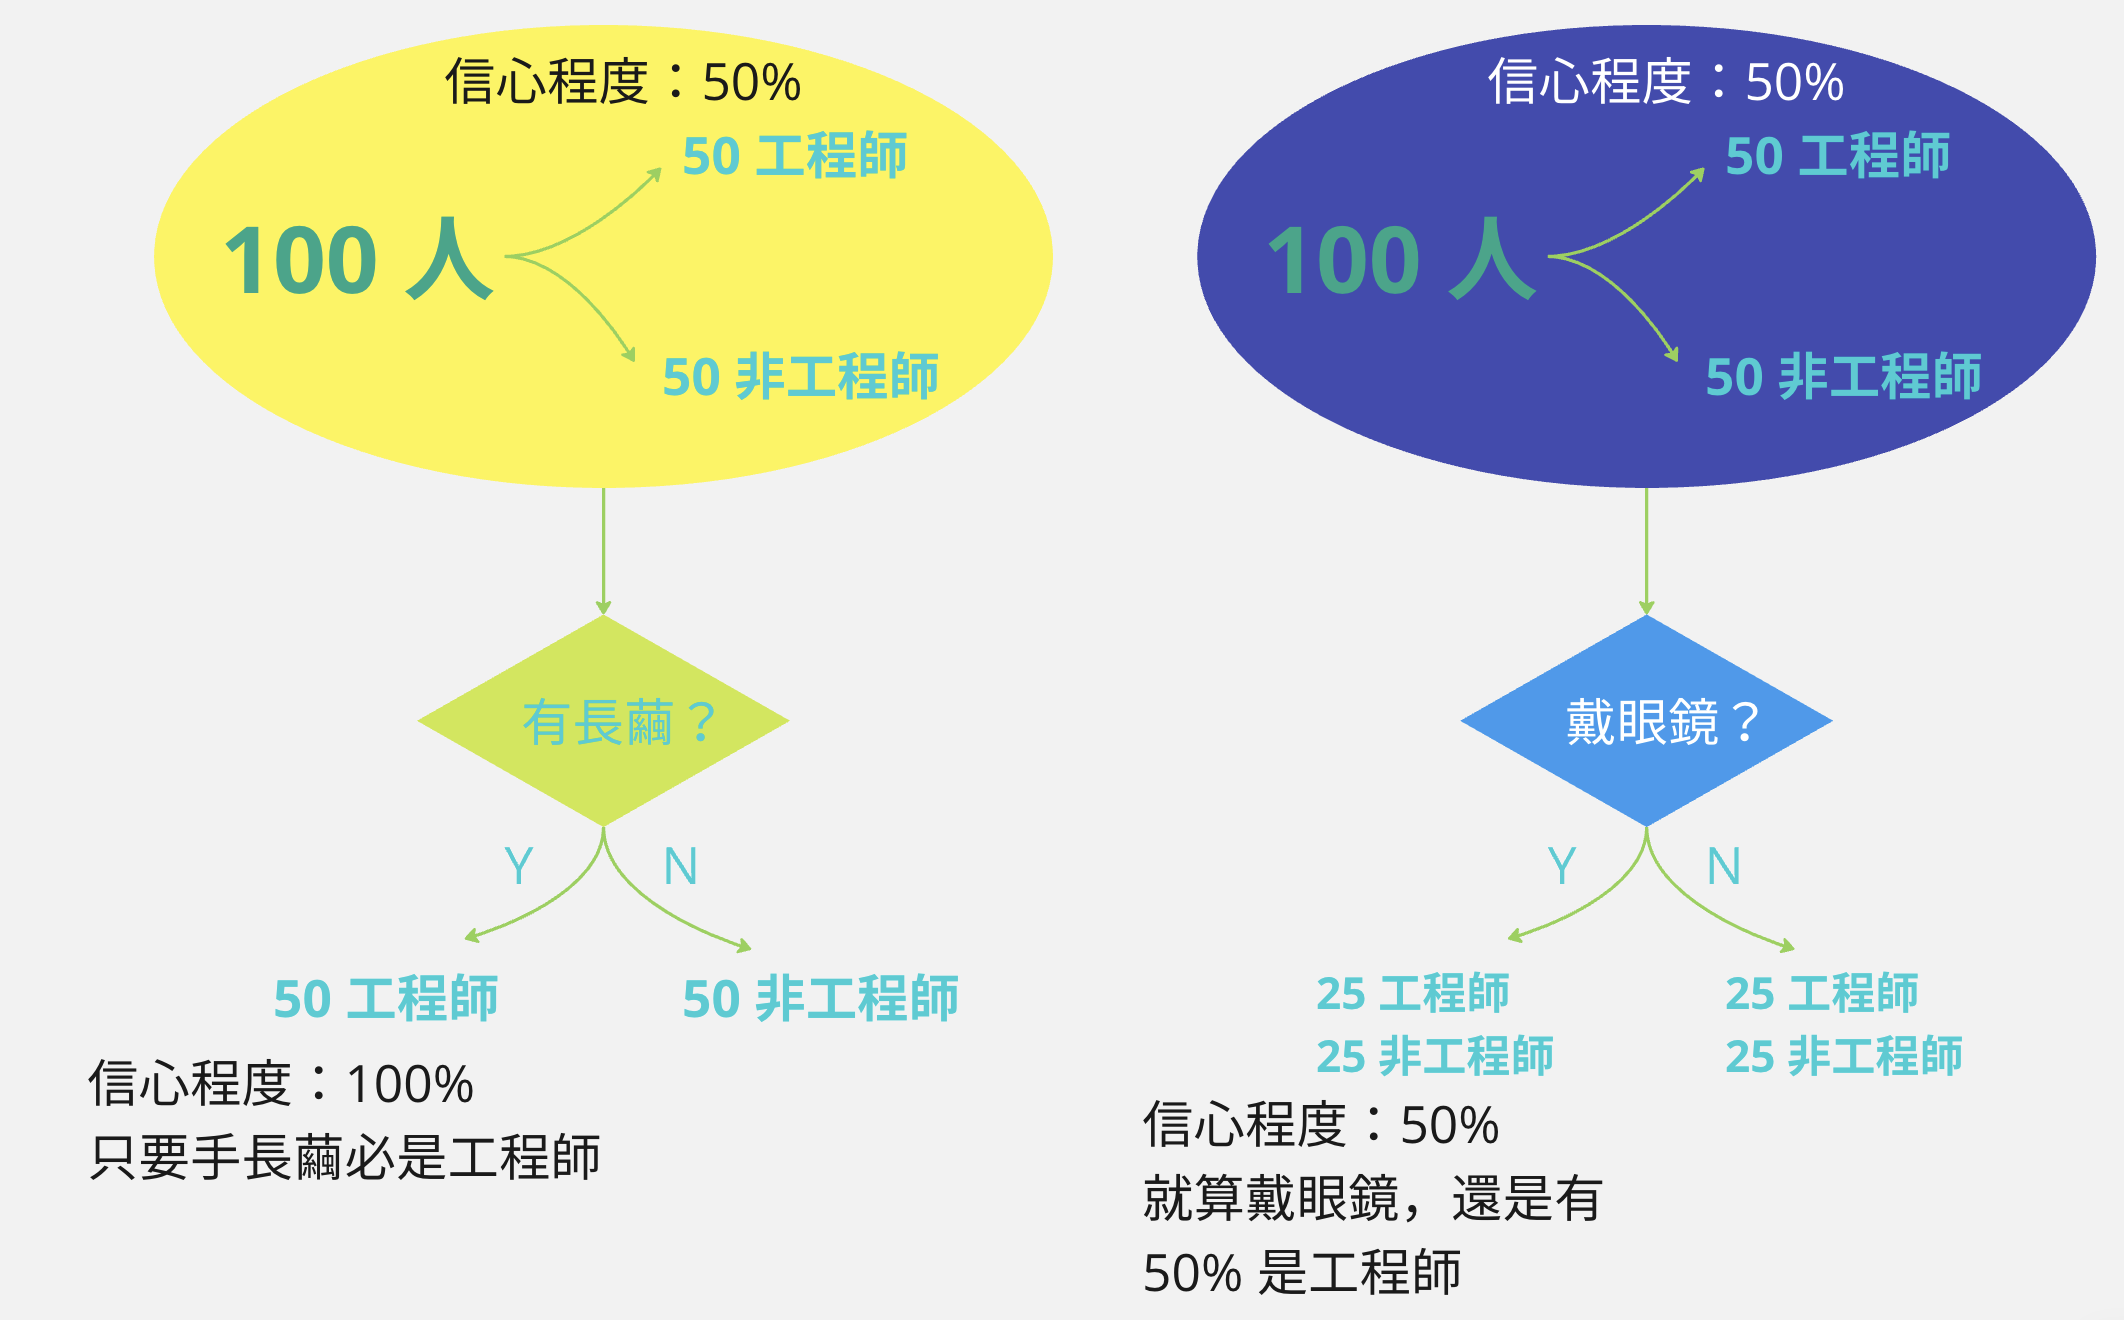


In [64]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

# pandas 兩種資料型態：DataFrame(2D 有行列)、Series(1D)

datas = pd.DataFrame(iris["data"], columns=iris["feature_names"]) #幫 iris data 加上欄位名稱 feature name

datas["ans"] = iris["target"] #幫 iris target 加上欄位名稱 ans
datas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 資料多寡 -> 非常重要

看問題難度決定，問題越難需要越多資料
(x 欄位的多寡 / y 的種類)

1. 統計學和數學最大的差異是，數學會有標準答案、統計學給你參考答案
2. 機器學習：幾千筆～幾萬筆
3. 深度學習：幾萬筆～幾十萬筆


In [65]:
# pandas 操作：drop (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

# pandas 中的 axis：1 -> 直行 ; 0 -> 橫列

x = datas.drop("ans", axis = 1) # drop 是產生新的表格
y = datas["ans"] # y 是 series



In [66]:
from sklearn.model_selection import train_test_split
# Demo
# train_test_split([1,2,3,4],
#                  [5,6,7,8],
#                  test_size=0.25
# ) 隨機把資料切成 3:1，會保留住 x 對應 y 的相對位子，比如 1 對到 5, 2 對到 6...

# 90% x, 10% x, 90% y, 10% y -> 準備好切兩半資料
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
#偽隨機分類，大家分出來的不一樣，如果有指定 random_state ，把隨機狀態固定住，那每次區別出來的分類都一樣

# 決策樹 (Decision Tree) -> 分類演算法都屬於決策樹的 family : 找一個東西分成兩群

之所以分兩群，是為了讓問題可以有重要性，可以明確區別階層






In [67]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2) #我們一定要至少設定深度，來避免過擬合問題
clf.fit(x_train, y_train) #fit 表示喂資料，要喂訓練資料，讓模型知道題目和答案之間的關係

DecisionTreeClassifier(max_depth=2)

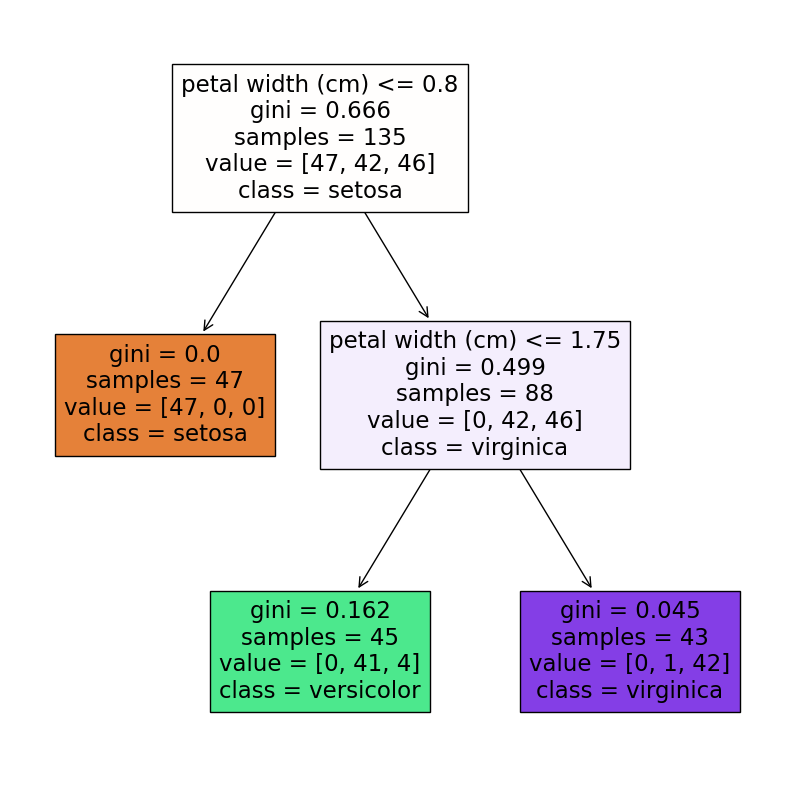

In [68]:
#matploblib: 所有繪圖基礎
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree #畫出決策樹
plt.figure(figsize=[10, 10]) #圖片尺寸
plot_tree(clf, feature_names=iris["feature_names"], class_names=iris["target_names"], filled=True) #clf 是我上面分類好的演算法
plt.show()#只出現圖，不出現細節數字

# 吉尼係數：平均猜錯機率（每個決策點都是為了讓猜錯機率變小）
# samples：樣本數
# value：135 區分為哪幾類
# class：樣本數最多數量的分類

# 決策樹會一直區分直到「兩邊都不會猜錯為止」

# DecisionTreeClassifier 參數 -> 控制前剪枝係數：max_depth, min_samples_split
# 老師經驗談：基本上控制好深度，再搭配隨機森林就很夠了

# 像鳶尾花的案例，分兩層就夠了


In [69]:
from sklearn.metrics import accuracy_score #metrics 是衡量標準
pre = clf.predict(x_test) #預測答案
accuracy_score(y_test, pre) #y_test 是正確答案

0.9333333333333333